<a href="https://colab.research.google.com/github/MohitNaren/ML/blob/main/ml4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn import datasets
# Read the dataset as a pandas DataFrame
dataset = datasets.load_diabetes(as_frame=True)
# Create observations matrix and target vector
X, y = dataset.data, dataset.target
# Create a unified DataFrame containing both
data = pd.concat([X, y], axis=1)

In [4]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
pd.set_option('float_format', '{:g}'.format)

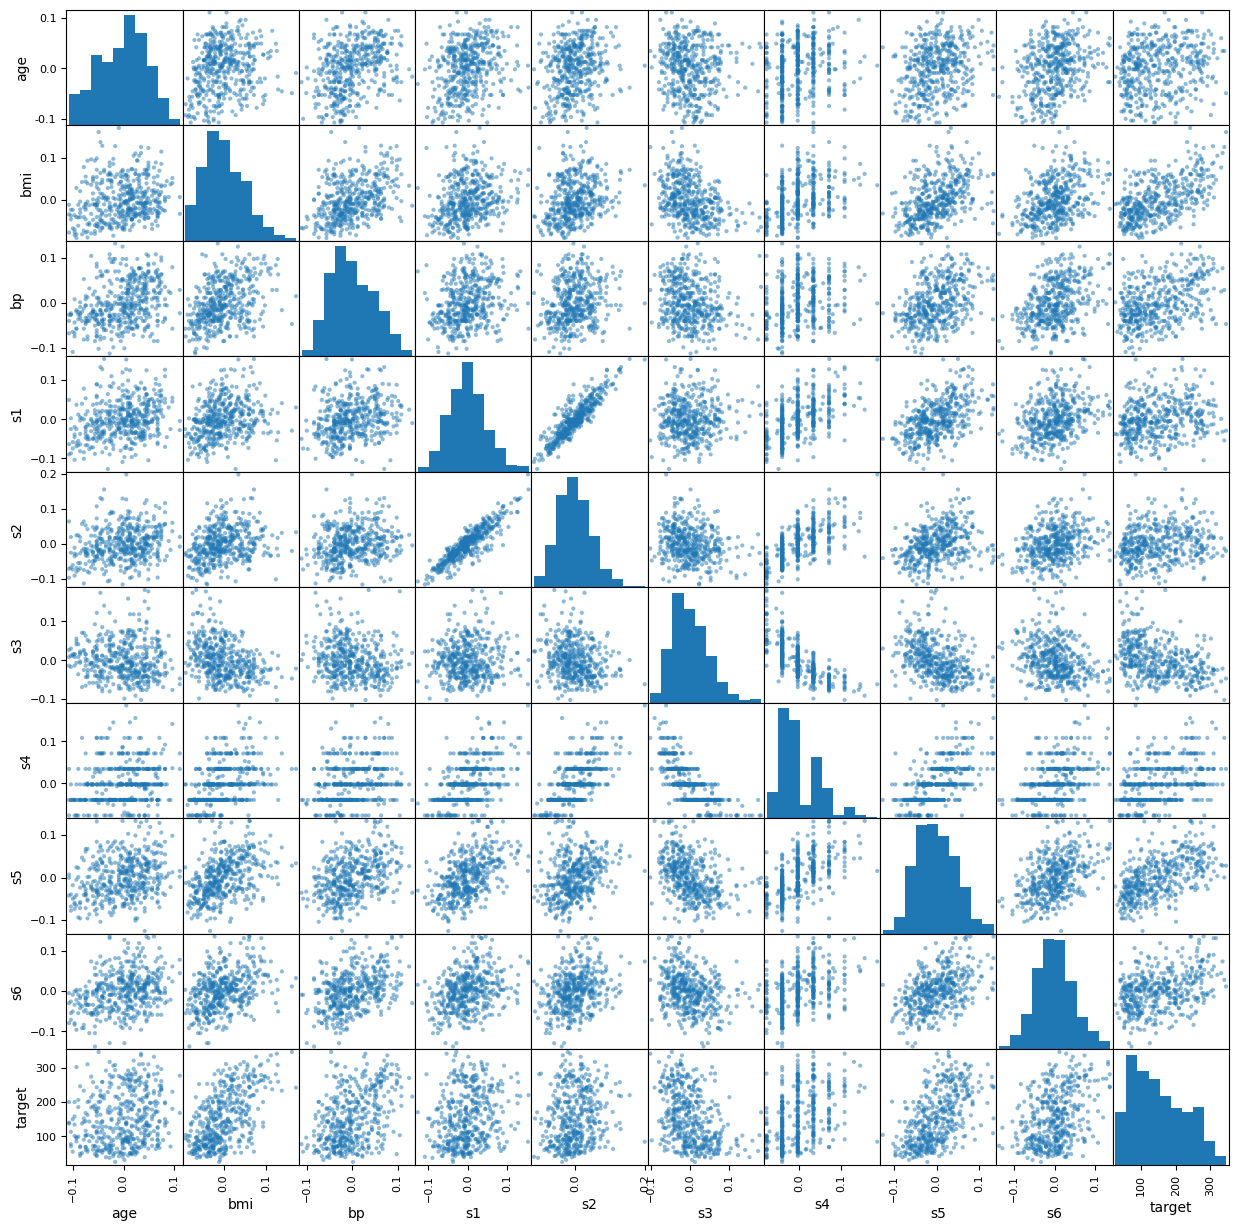

In [7]:
import matplotlib.pyplot as plt
# Extract numeric data
numeric_data = data.drop(["sex"], axis=1)
# Plot scatter matrix
axes = pd.plotting.scatter_matrix(numeric_data, figsize=(15, 15))
# Fix y-axis label formatting
new_labels = [
round(float(i.get_text()), 2) for i in axes[0, 0].get_yticklabels()
]
_ = axes[0, 0].set_yticklabels(new_labels)

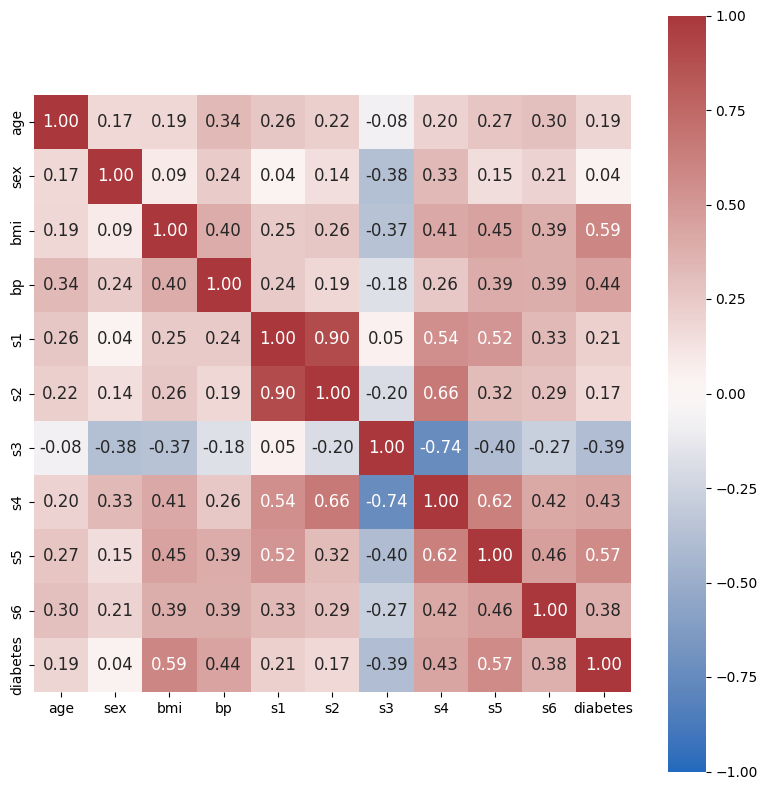

In [9]:
import numpy as np
import seaborn as sns
# Calculate correlation matrix using NumPy
correlation_matrix = np.corrcoef(data.values.T)
# Plot correlation matrix using seaborn
fig, ax = plt.subplots(figsize=(8, 8))
tick_labels = list(X.columns) + ['diabetes']
hm = sns.heatmap(
correlation_matrix,
ax=ax,
cbar=True, # Show colorbar
cmap="vlag", # Specify colormap
vmin=-1, # Min. value for colormapping
vmax=1, # Max. value for colormapping
annot=True, # Show the value of each cell
square=True, # Square aspect ratio in cell sizing
fmt='.2f', # Float formatting
annot_kws={'size':
12}, # Font size of the values displayed within the cells
xticklabels=tick_labels, # x-axis labels
yticklabels=tick_labels) # y-axis labels
plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
# Create a vector of the single predictor values
simple_X = X.bmi.to_numpy().reshape(len(X), 1)
# Split for simple linear regression
simple_X_train, simple_X_test, y_train, y_test = train_test_split(simple_X,
y,

random_state=0,
test_size=0.2)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
_ = model.fit(simple_X_train, y_train)

In [12]:
simple_y_pred = model.predict(simple_X_test)

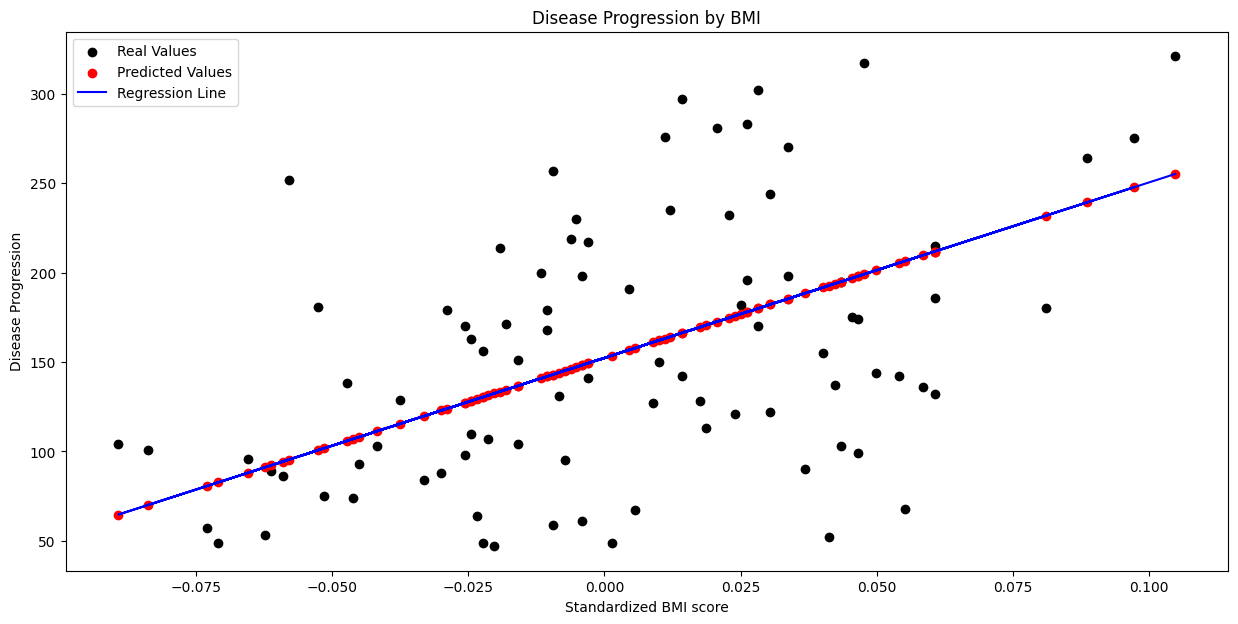

In [13]:
# Create figure
fig, ax = plt.subplots(figsize=(15, 7))
# Plot real values scatter plot
_ = plt.scatter(simple_X_test, y_test, color="black", label="Real Values")
# Plot predicted values scatter plot
_ = plt.scatter(simple_X_test,
simple_y_pred,
color="red",
label="Predicted Values")
# Plot regression line
_ = plt.plot(simple_X_test,
simple_y_pred,
color="blue",
label="Regression Line")
# Show legend
_ = plt.legend()
# Set title
title = "Disease Progression by BMI"
plt.title(title)
# Sex axis labels
ax.set_xlabel("Standardized BMI score")
_ = ax.set_ylabel("Disease Progression")

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, simple_y_pred)
r_squared = r2_score(y_train, model.predict(simple_X_train))
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f'Mean Squared Error: {mse:.2f}')
print(f'Coefficient of Determination: {r_squared:.2f}')

Coefficient: 981.66
Intercept: 152.29
Mean Squared Error: 4150.68
Coefficient of Determination: 0.38


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 5 rows:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL           65     8450   Pave   NaN      Reg   
1   2          20       RL           80     9600   Pave   NaN      Reg   
2   3          60       RL           68    11250   Pave   NaN      IR1   
3   4          70       RL           60     9550   Pave   NaN      IR1   
4   5          60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4      

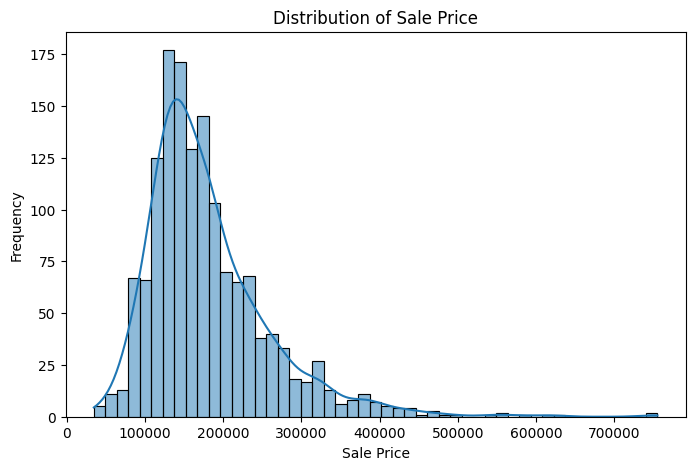

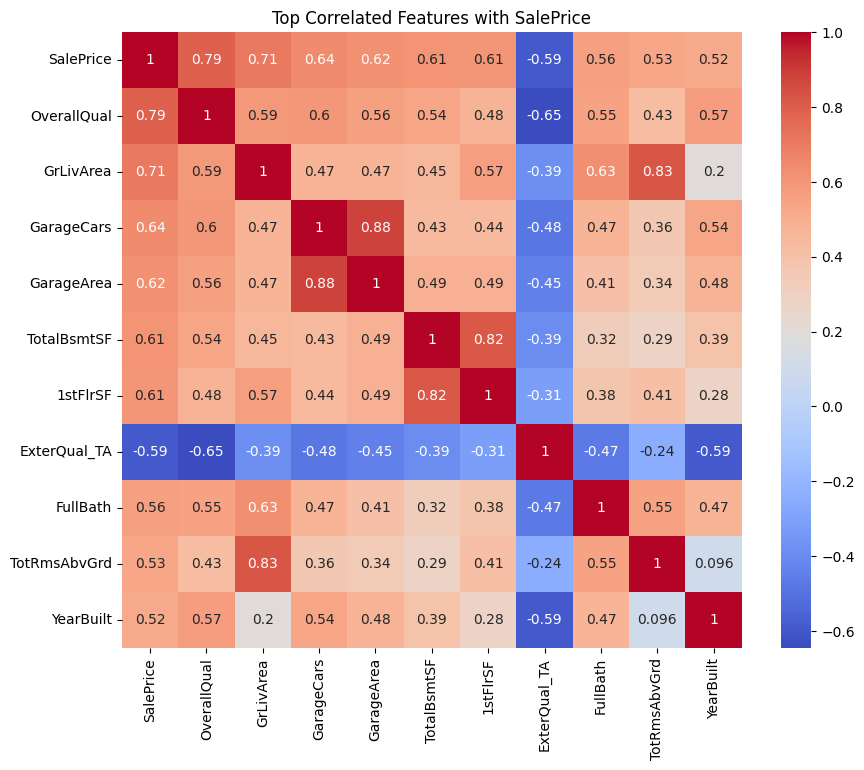

In [15]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 3: Load Dataset
file_path = '/content/drive/MyDrive/ML_DATASETS/Copy of house_price_train.csv'
df = pd.read_csv(file_path)

# STEP 4: Basic Info
print("First 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values (Top 20):")
print(df.isnull().sum().sort_values(ascending=False).head(20))

# STEP 5: Drop Columns with >50% Missing Values
threshold = 0.5 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# STEP 6: Fill Missing Values
# Numeric Columns: fill with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Categorical Columns: fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# STEP 7: Encode Categorical Variables (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)

# STEP 8: Check for Remaining Missing Values
print("\nRemaining Missing Values:", df.isnull().sum().sum())

# STEP 9: Visualize Target Variable (e.g., SalePrice)
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# STEP 10: Correlation Heatmap (Top 10 Features Correlated with SalePrice)
corr_matrix = df.corr()
top_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(11).index

plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with SalePrice')
plt.show()


In [16]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RMSE: 52349.37
R² Score: 0.6427


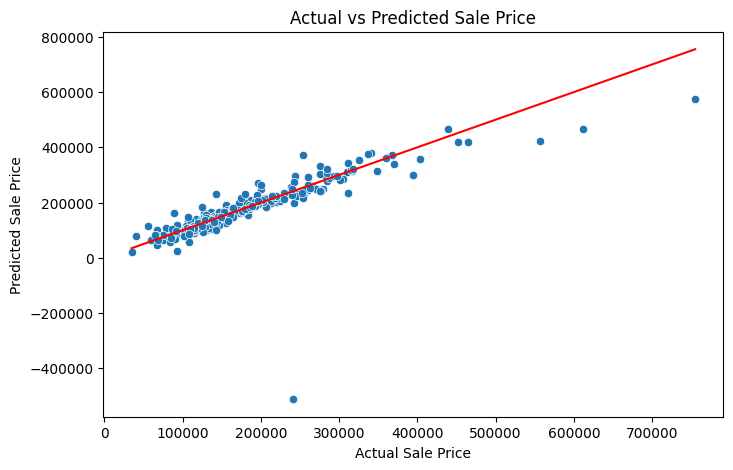

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

# 5. Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# 6. Plot Predictions vs Actual
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # perfect line
plt.show()

Train RMSE: 19869.00 | R²: 0.9338
Test  RMSE: 52349.37 | R²: 0.6427


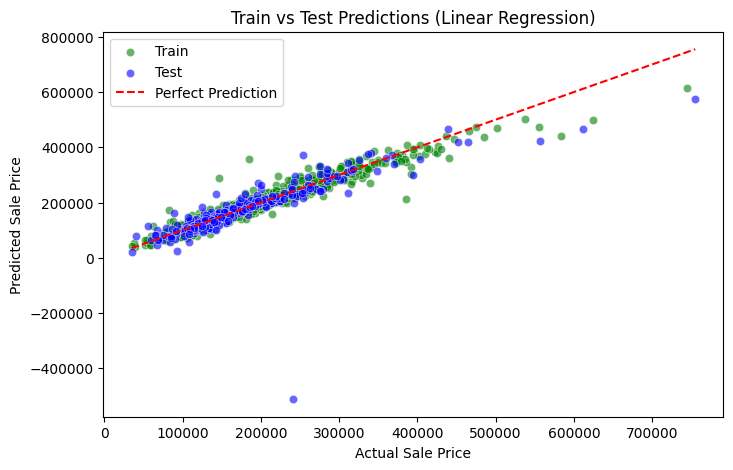

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on both train and test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate RMSE for both
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.2f} | R²: {train_r2:.4f}")
print(f"Test  RMSE: {test_rmse:.2f} | R²: {test_r2:.4f}")

# Plot both
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train, y=y_train_pred, label='Train', color='green', alpha=0.6)
sns.scatterplot(x=y_test, y=y_test_pred, label='Test', color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Train vs Test Predictions (Linear Regression)")
plt.legend()
plt.show()


In [21]:
import pandas as pd

file_path = '/content/drive/MyDrive/ML_DATASETS/Copy of house_price_train.csv'
df = pd.read_csv(file_path)

print(df.head())
print(df.info())
print(df.describe())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL           65     8450   Pave   NaN      Reg   
1   2          20       RL           80     9600   Pave   NaN      Reg   
2   3          60       RL           68    11250   Pave   NaN      IR1   
3   4          70       RL           60     9550   Pave   NaN      IR1   
4   5          60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [22]:
# Drop columns with too many missing values (e.g., more than 50%)
threshold = 0.5 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Fill missing numeric values with median
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 235 entries, Id to SaleCondition_Partial
dtypes: bool(197), float64(3), int64(35)
memory usage: 714.4 KB
None


/tmp/ipython-input-786534823.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [23]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


RMSE: 52349.37
R²: 0.6427


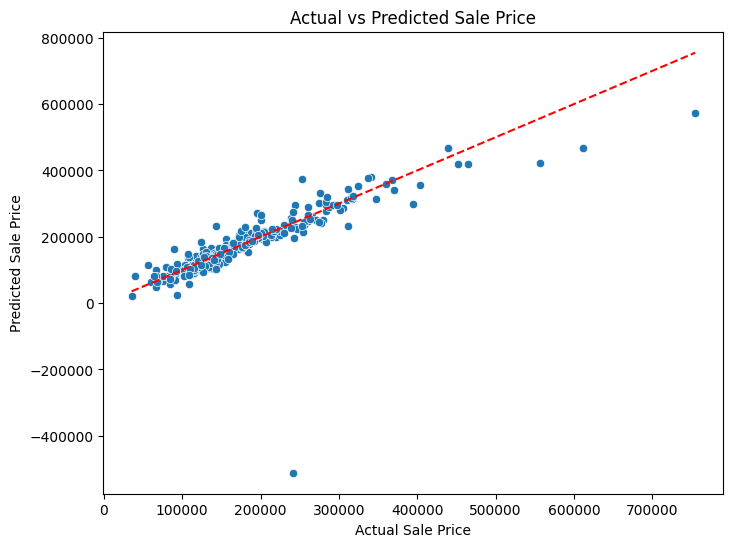

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()


Train RMSE: 19869.00 | R²: 0.9338
Test RMSE: 52349.37 | R²: 0.6427


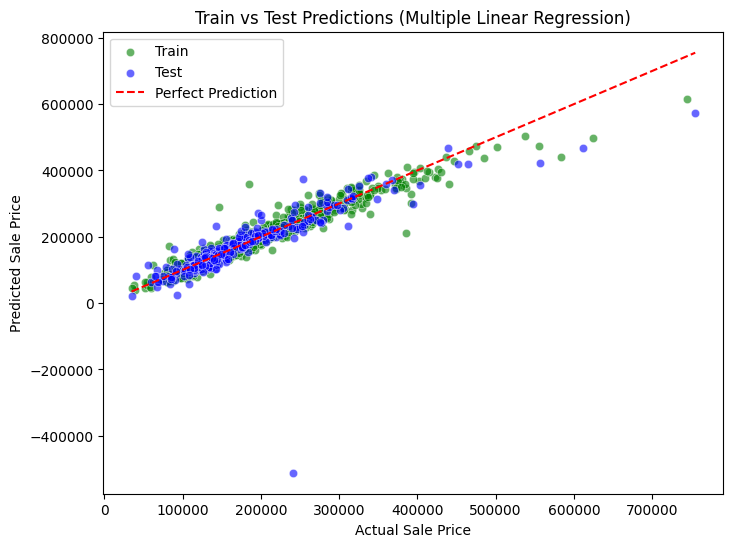

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on both training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics (optional, but good to have)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.2f} | R²: {train_r2:.4f}")
print(f"Test RMSE: {test_rmse:.2f} | R²: {test_r2:.4f}")

# Plot both train and test predictions
plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_train, y=y_train_pred, label='Train', color='green', alpha=0.6)
sns.scatterplot(x=y_test, y=y_test_pred, label='Test', color='blue', alpha=0.6)

# Line for perfect prediction
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')

plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Train vs Test Predictions (Multiple Linear Regression)')
plt.legend()
plt.show()


In [30]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Load Titanic dataset
file_path = '/content/drive/MyDrive/ML_DATASETS/Copy of titanic_train.csv'
df = pd.read_csv(file_path)

# Quick check
print(df.head())
print(df.info())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket    Fare Cabin Embarked  
0      0         A/5 21171    7.25   NaN        S  
1      0          PC 17599 71.2833   C85        C  
2      0  STON/O2. 3101282   7.925   NaN 

In [31]:
# Drop columns that won't help the model
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-1963705148.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1963705148.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [32]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [33]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

# Accuracy
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Train Accuracy: 0.8019662921348315
Test Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



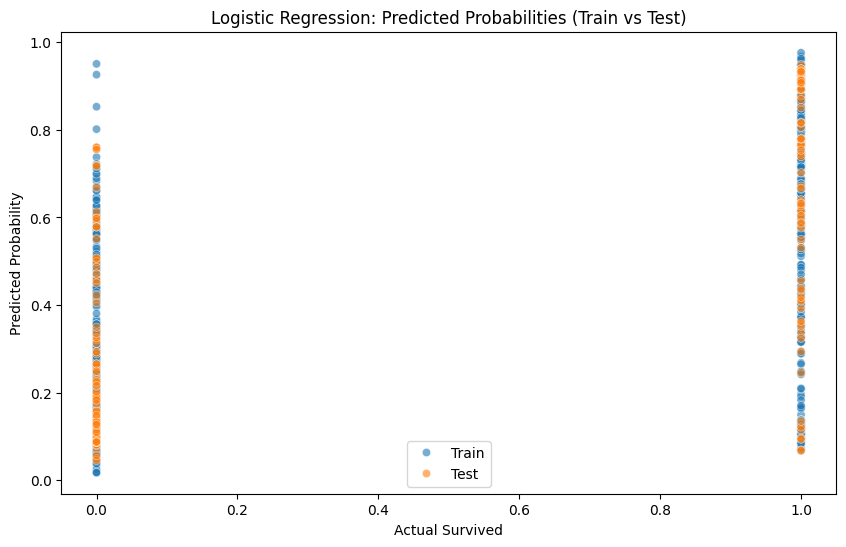

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predicted probabilities for class 1 (survived)
y_train_prob = log_model.predict_proba(X_train)[:,1]
y_test_prob = log_model.predict_proba(X_test)[:,1]

# Prepare DataFrame for plotting
train_df = pd.DataFrame({'Actual': y_train, 'Predicted_Prob': y_train_prob, 'Set': 'Train'})
test_df = pd.DataFrame({'Actual': y_test, 'Predicted_Prob': y_test_prob, 'Set': 'Test'})

plot_df = pd.concat([train_df, test_df])

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=plot_df, x='Actual', y='Predicted_Prob', hue='Set', alpha=0.6)
plt.xlabel('Actual Survived')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression: Predicted Probabilities (Train vs Test)')
plt.legend()
plt.show()


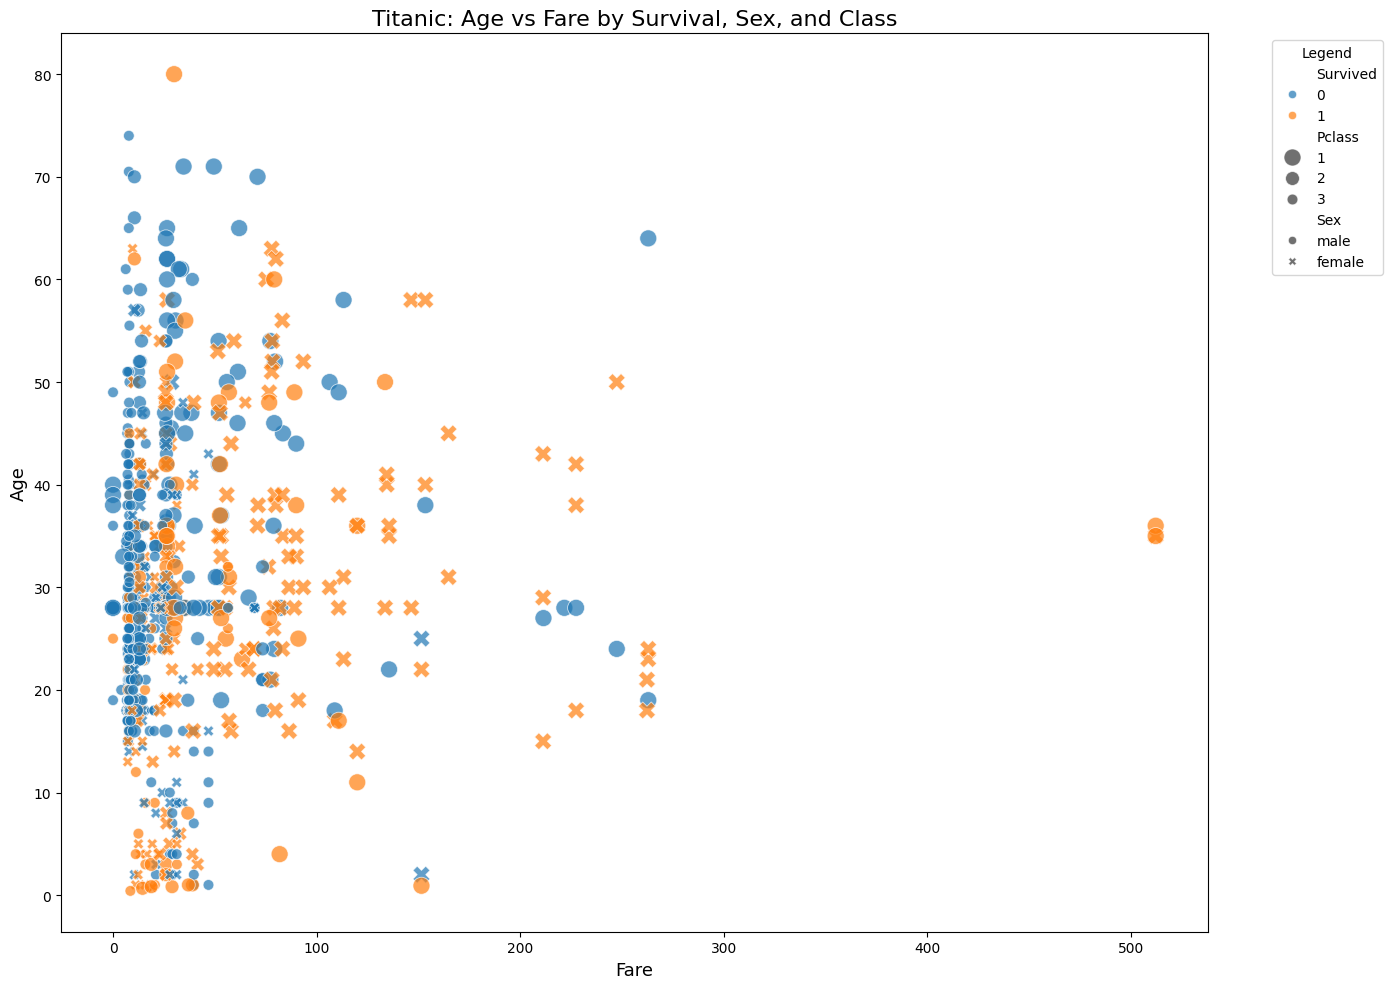

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload dataset if needed
df = pd.read_csv('/content/drive/MyDrive/ML_DATASETS/Copy of titanic_train.csv')

# Safe fillna without warnings
df['Age'] = df['Age'].fillna(df['Age'].median())

# Only fill 'Embarked' if it exists
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Create the plot
fig, ax = plt.subplots(figsize=(14, 10))

sns.scatterplot(
    data=df,
    x='Fare',
    y='Age',
    hue='Survived',
    style='Sex',
    size='Pclass',
    sizes={1: 150, 2: 100, 3: 60},
    alpha=0.7,
    ax=ax
)

ax.set_title("Titanic: Age vs Fare by Survival, Sex, and Class", fontsize=16)
ax.set_xlabel("Fare", fontsize=13)
ax.set_ylabel("Age", fontsize=13)
plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


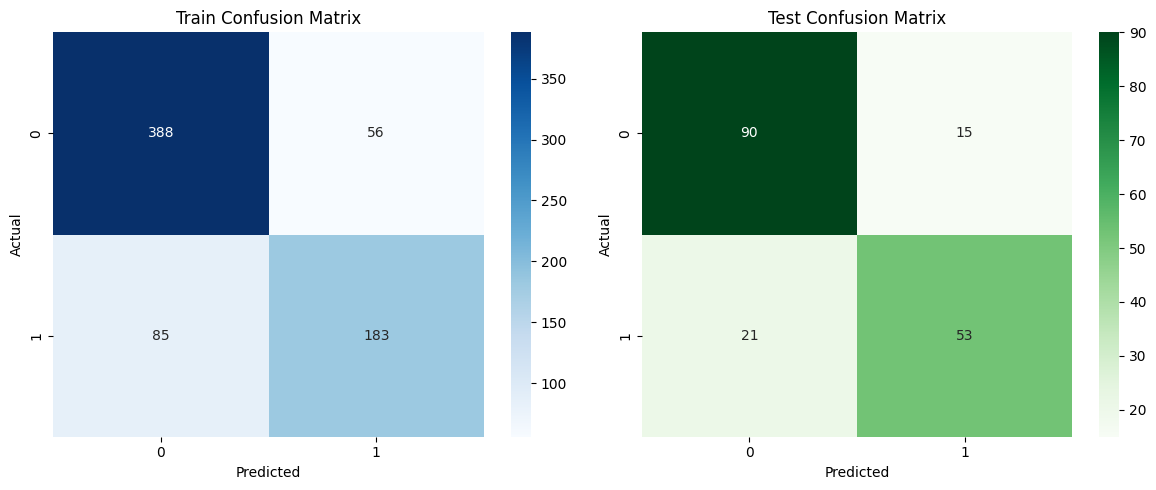

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


/tmp/ipython-input-1632628158.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Age', data=df, palette='Set2')


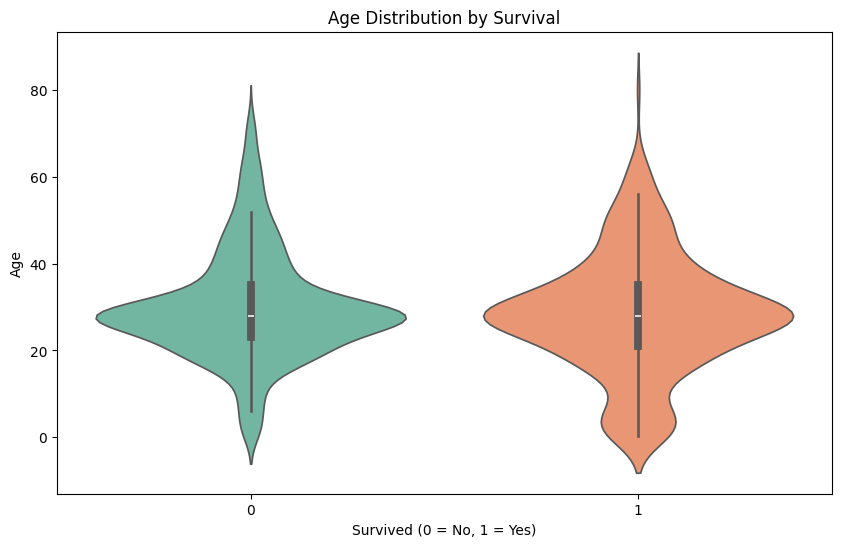

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=df, palette='Set2')

plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


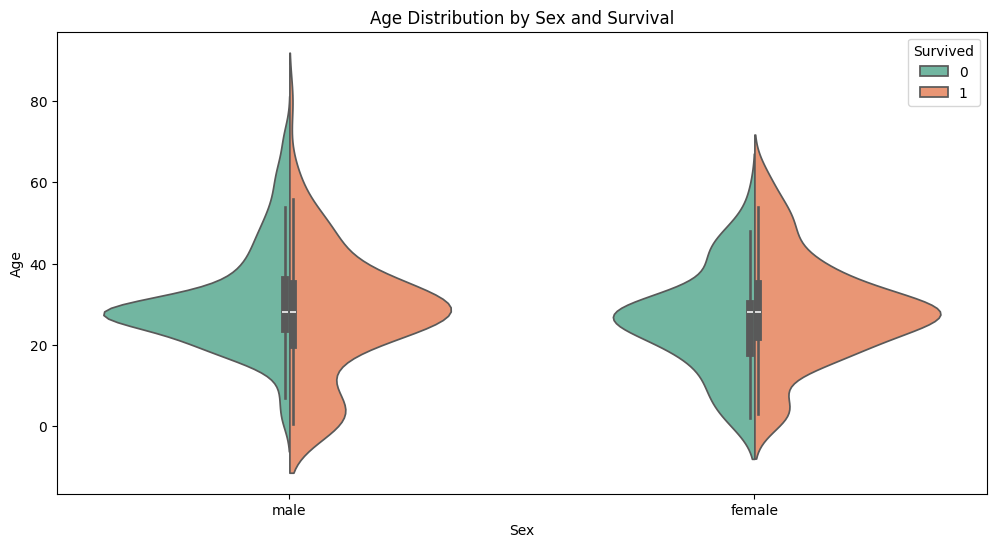

In [42]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette='Set2')

plt.title('Age Distribution by Sex and Survival')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(title='Survived')
plt.show()
